In [1]:
import backtrader as bt
import alpaca_backtrader_api as api
import alpaca_trade_api as tradeapi


from config import key_id, secret_key

In [2]:
api = tradeapi.REST(key_id, secret_key)

In [3]:
#get data and turn to dataframe form
data=api.get_barset(symbols = ("INTC"), start = "2019-04-21", end = "2020-01-01", timeframe = "15Min", limit=1000)
df=data.df #converts to dataframe

In [4]:
#get rid of multiindex, otherwise backtrader will have problems
df=df.INTC

In [5]:
#previewing
df.iloc[0:10]

,open,high,low,close,volume
2020-01-30 13:00:00-05:00,65.415,65.505,65.375,65.445,15362
2020-01-30 13:15:00-05:00,65.455,65.560,65.340,65.560,14862
2020-01-30 13:30:00-05:00,65.550,65.610,65.470,65.505,7593
2020-01-30 13:45:00-05:00,65.530,65.545,65.530,65.545,639
2020-01-30 14:00:00-05:00,65.550,65.765,65.510,65.765,6005
2020-01-30 14:15:00-05:00,65.765,65.860,65.745,65.795,7928
2020-01-30 14:30:00-05:00,65.770,66.120,65.660,65.720,7608
2020-01-30 14:45:00-05:00,65.965,66.025,65.960,65.985,1062
2020-01-30 15:00:00-05:00,66.025,66.120,65.910,65.975,15182
2020-01-30 15:15:00-05:00,65.970,66.255,65.925,66.060,31783


In [6]:
#feed dataframe to cerbro
datacere = bt.feeds.PandasData(dataname=df)

datacere

In [7]:
#create backtrader
cerebro = bt.Cerebro()

In [8]:
#feed strat to cerebro
class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position

            


In [9]:
cerebro.addstrategy(SmaCross)

0

In [10]:
#set up cerebro

cerebro.broker.setcash(100000)
cerebro.broker.setcommission(commission=0.0)
cerebro.addsizer(bt.sizers.PercentSizer, percents=20)
cerebro.adddata(datacere)


In [11]:
#create plotinfo dict for plotting options
plotinfo = dict(plot=True,
                subplot=True,
                plotname='',
                plotskip=False,
                plotabove=False,
                plotlinelabels=False,
                plotlinevalues=True,
                plotvaluetags=True,
                plotymargin=0.0,
                plotyhlines=[],
                plotyticks=[],
                plothlines=[],
                plotforce=False,
                plotmaster=None,
                plotylimited=True,
           )

In [12]:
#change window settings
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 20, 15  # that's default image size for this interactive session
pylab.rcParams['font.family'] = 'sans-serif'
pylab.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
pylab.rcParams['font.serif'] = ['Bitstream Vera Sans']
pylab.rcParams["font.size"] = "20"

In [13]:
sma = bt.indicators.SimpleMovingAverage(datacere, period=15)
sma.plotinfo.plotname = 'mysma'

<IPython.core.display.Javascript object>


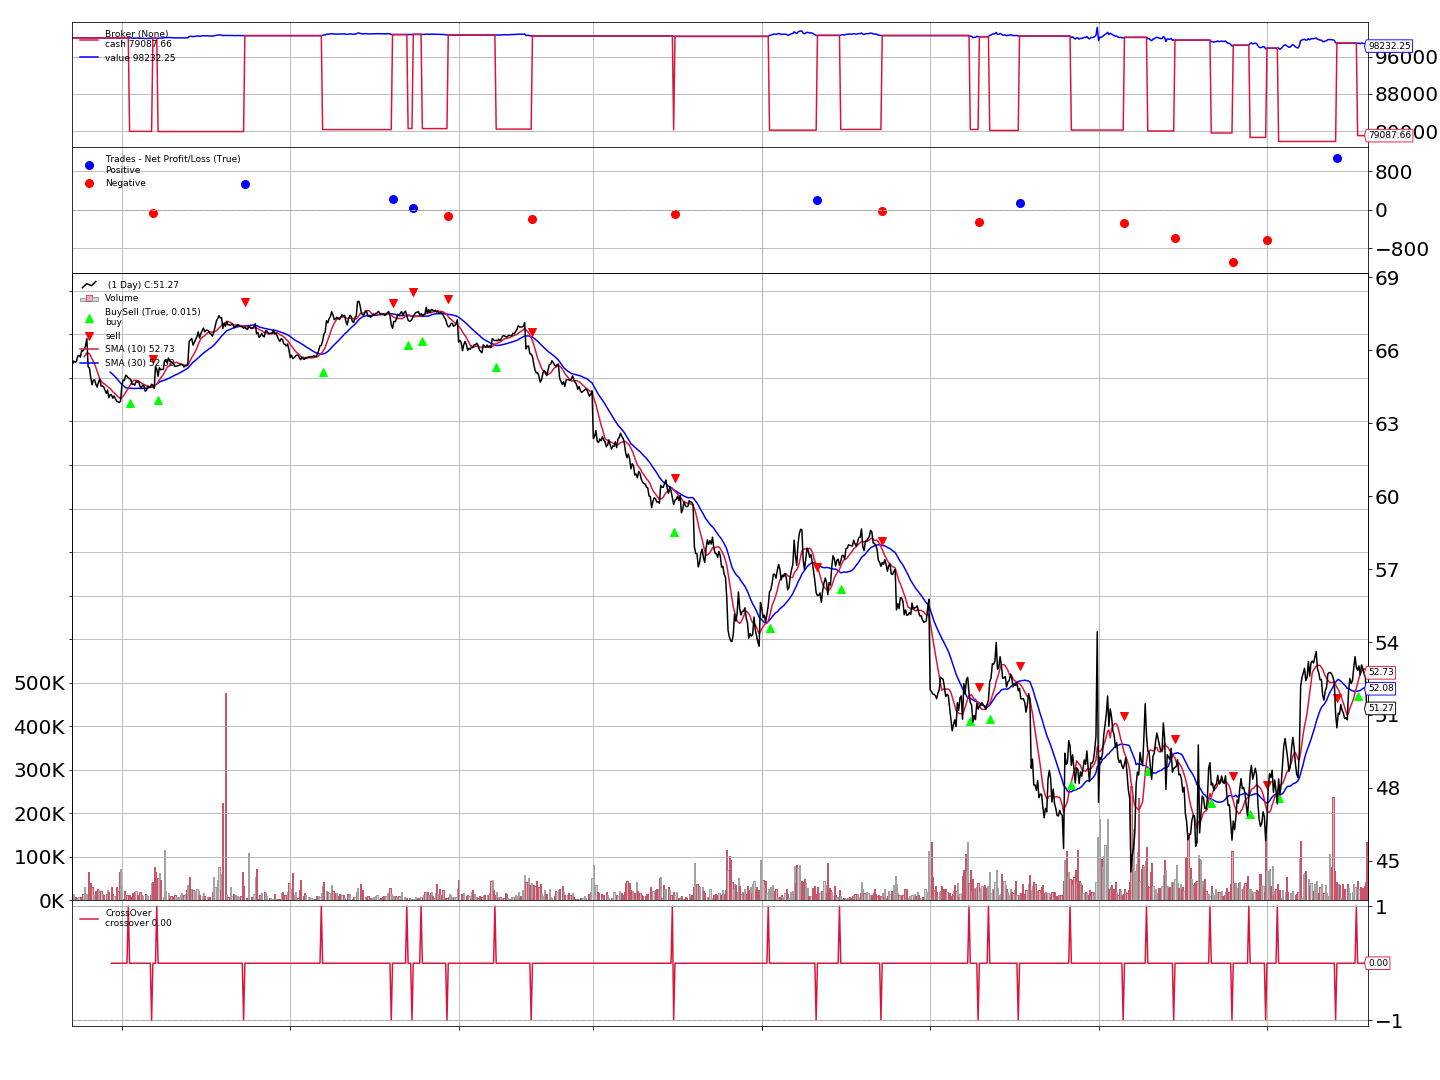

[[<Figure size 1440x1080 with 5 Axes>]]

In [14]:


# Run over everything
cerebro.run()

# Plot the result
cerebro.plot()
